Kaan Karakaş 18070001042

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read and Show Data

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Reservations.csv')
print(data)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

Summarize Data

In [3]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from ydata_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Missing Values:**
There is not any missing value in dataset

**Distinct Values:** Booking_Id: There are 36275 unique values.
no_of_adults : 5 distinct values
no_of_children :6 distinct values
no_of_weekend_nights : 8 distinct values
no_of_week_nights :18 distinct values
type_of_meal_plan : 4 distinct values
required_car_parking_space : 2 distinct values
room_type_reserved : 7 distinct values
lead_time : 352 distinct values
arrival_year : 2 distinct values
arrival_month:12 distinct values
arrival_date:31
market_segment_type:5
repeated_guest:2
no_of_previous_cancellations:9
no_of_previous_bookings_not_canceled:59
avg_price_per_room:3930
no_of_special_requests:6
booking_status:2


ScatterPlot of Lead Time and Booking Status

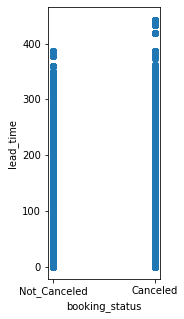

In [5]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(2,5))
plt.scatter(data['booking_status'],data['lead_time'])
plt.xlabel('booking_status')
plt.ylabel('lead_time')
plt.show()

ScatterPlot of Average Price per Room and Booking Status:

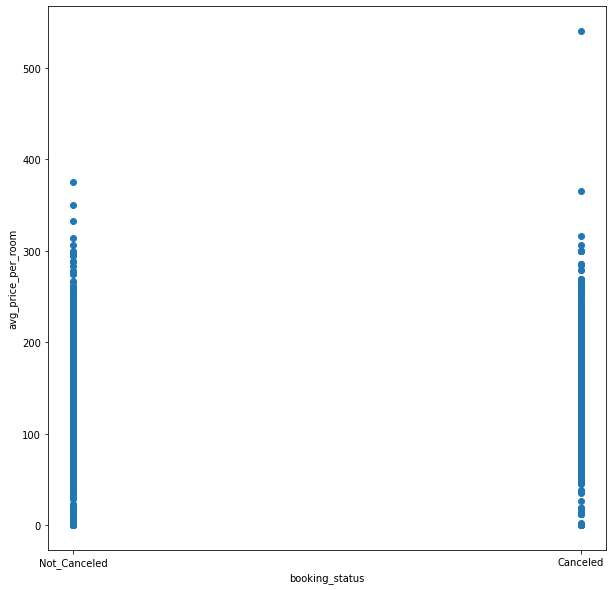

In [6]:
plt.subplots(figsize=(10,10))
plt.scatter(data['booking_status'],data['avg_price_per_room'])
plt.xlabel('booking_status')
plt.ylabel('avg_price_per_room')
plt.show()

Boxplot of Booking Status and no_of_special_requests

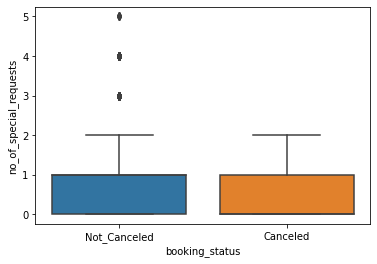

In [7]:
import seaborn as sns
sns.boxplot(x=data["booking_status"], y=data["no_of_special_requests"])
sns.set(rc={'figure.figsize':(2,15)})

ScatterPlot for market_segment_type and booking_status

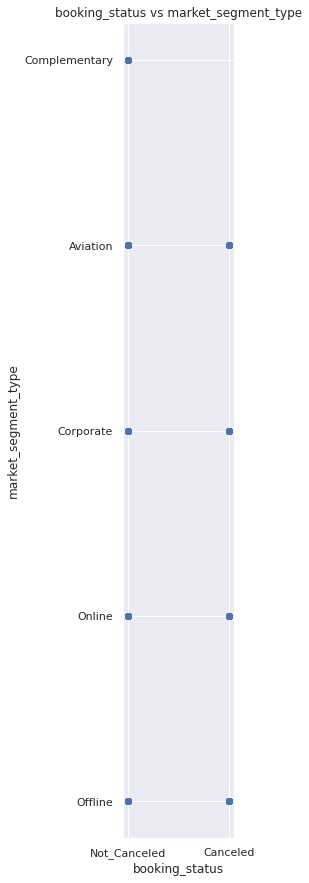

In [8]:
room_type_reserved = data['market_segment_type'].astype(str)
booking_status = data['booking_status'].astype(str)
plt.scatter(booking_status, room_type_reserved)
plt.xlabel('booking_status')
plt.ylabel('market_segment_type')
plt.title('booking_status vs market_segment_type')
plt.show()

<AxesSubplot: xlabel='booking_status', ylabel='Count'>

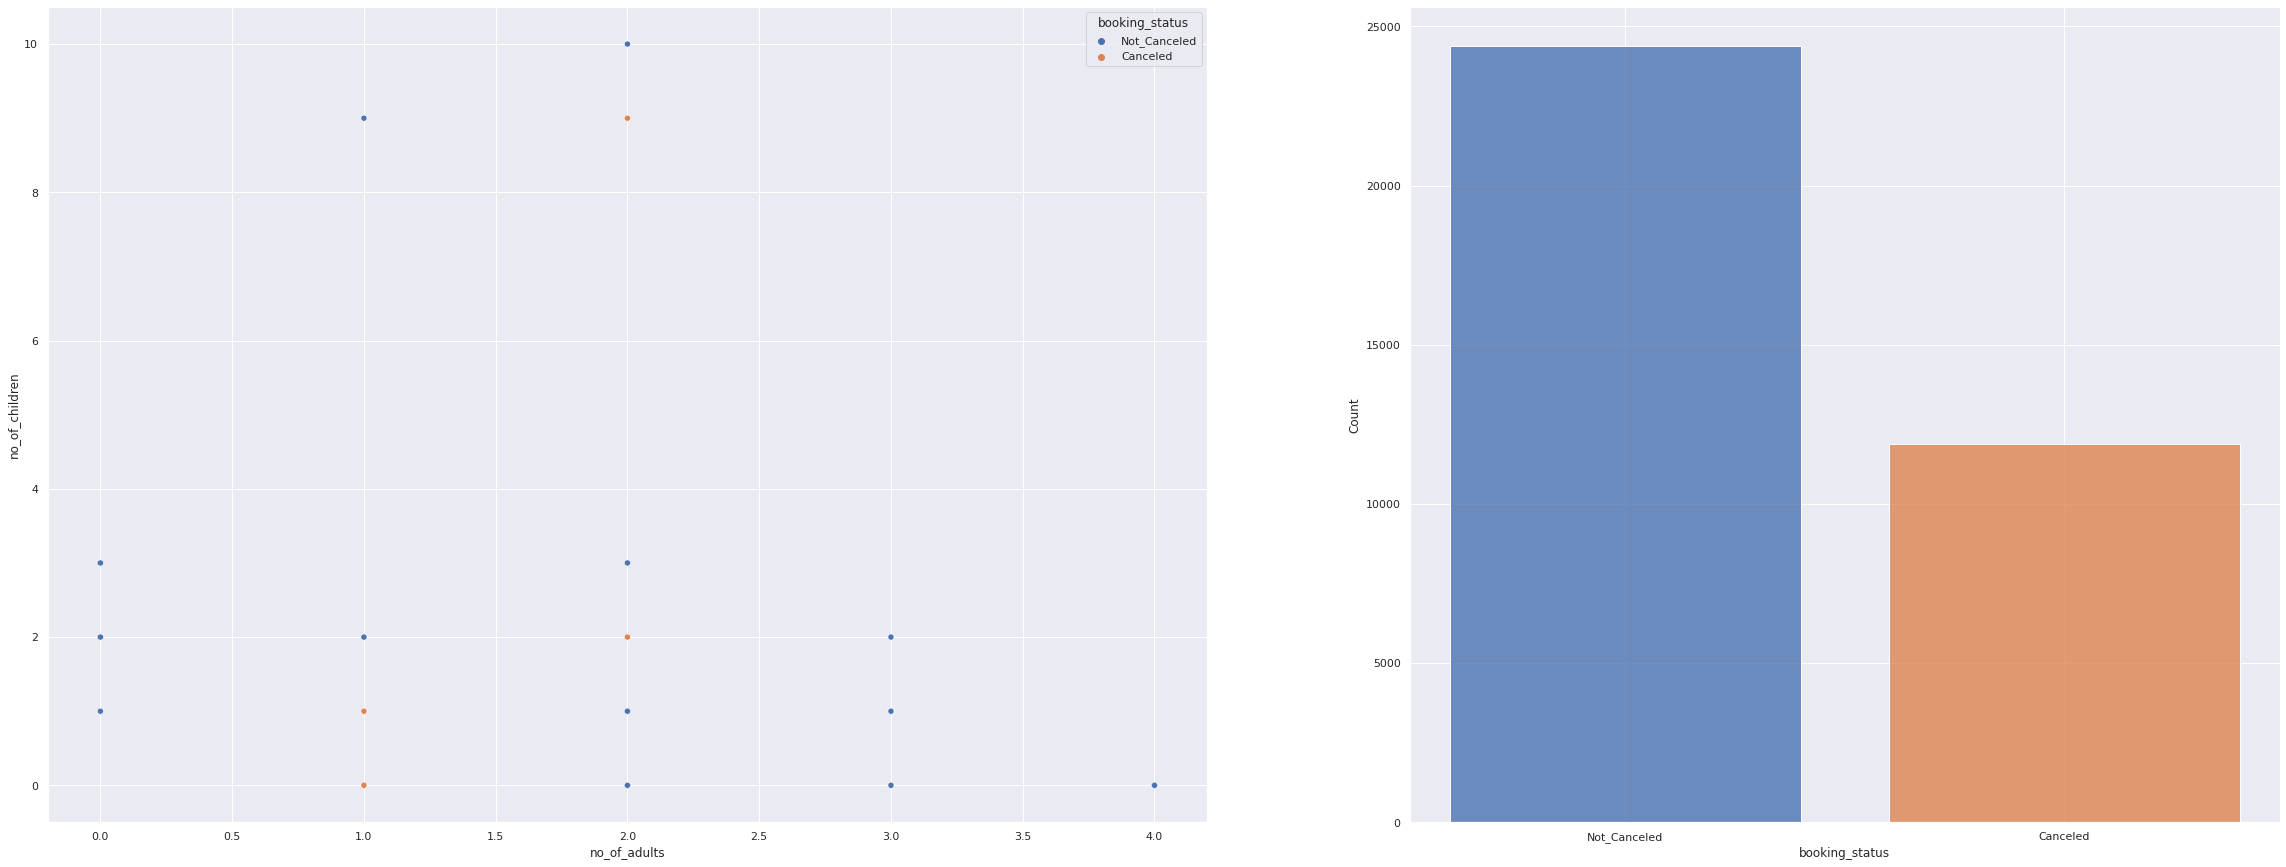

In [9]:
f, axs = plt.subplots(1, 2, figsize=(40, 15), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=data, x="no_of_adults", y="no_of_children", hue="booking_status", ax=axs[0])
sns.histplot(data=data, x="booking_status", hue="booking_status", shrink=.8, alpha=.8, legend=False, ax=axs[1])

**what you find interesting in data:**From the first scatterplot, I saw that some of the canceled reservations had a higher lead time than the non-cancelled ones.When I examined the second scatterplot, I observed that some of the canceled reservations had more average price rooms than those that were not. I've seen people who cancel their reservations indicate fewer special requests than those who don't.When I compared market segment type and book status, I noticed that those who are complemantary do not cancel their reservations.Also, according to the data, I determined that there are more people who do not cancel their reservations than those who do.

I use feature selector so firstly, I will convert categorical variables into numerical values using label Encoder and ordinal Encoder.

**Transform any categorical as needed:**

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
data["market_segment_type"] = label_encoder.fit_transform(data["market_segment_type"])
data["booking_status"] = label_encoder.fit_transform(data["booking_status"])

encoder = OrdinalEncoder()
encoder.fit(data[['type_of_meal_plan', 'room_type_reserved']])
data[['type_of_meal_plan', 'room_type_reserved']] = encoder.transform(data[['type_of_meal_plan', 'room_type_reserved']])

In [11]:
data = data.drop(data.columns[[0]], axis=1)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                0.0                           0                 0.0   
1                3.0                           0                 0.0   
2                0.0                           0                 0.0   
3                0.0                           0                 0.0   
4                3.0                           0                 0.0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

('no_of_adults', 39.96757263650661)
('no_of_children', 61.11927924531203)
('no_of_weekend_nights', 128.53947180295586)
('no_of_week_nights', 283.30140437036505)
('type_of_meal_plan', 55.117965055870314)
('required_car_parking_space', 261.09818187968045)
('room_type_reserved', 52.98105579864887)
('lead_time', 604368.9063806966)
('arrival_year', 0.08536386110023843)
('arrival_month', 5.810592072818743)
('arrival_date', 20.072917544414995)
('market_segment_type', 87.73597521547674)
('repeated_guest', 406.8358766761544)
('no_of_previous_cancellations', 239.75803525118613)
('no_of_previous_bookings_not_canceled', 2634.9804929337024)
('avg_price_per_room', 8777.701483394689)
('no_of_special_requests', 2317.5632929684953)


Text(0.5, 1.0, 'Score Comparison')

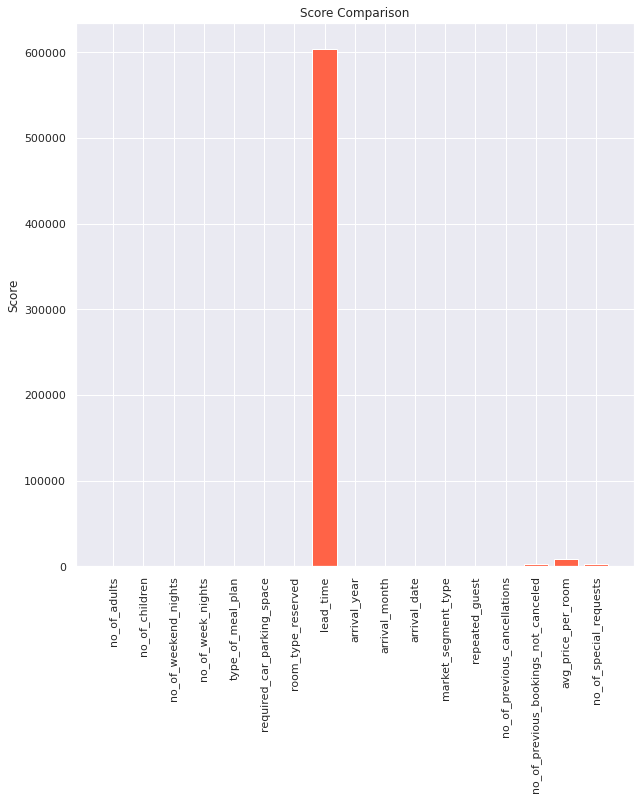

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
X=data.iloc[:,0:17]
y=data.iloc[:,17]

#Select best 4 features based on Chisquare
selector = SelectKBest(chi2, k=4)
X_new= selector.fit_transform(X,y)

for feature in zip(data.columns[0:17], selector.scores_):
    print(feature)

# Create a bar chart for visualizing the scores for each feature
plt.figure(figsize=(10,10))
plt.bar(x=data.columns[0:17], height=selector.scores_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Score')
plt.title('Score Comparison')

 **What drivers (features) would you choose for your analysis? 
Explain and drop other features:** I used feature selection and it shows that, lead_time, avg_price_per_room, no_of_previous_bookings_not_canceled and no_of_special_requests is available for analysis because they have the highest chi-squared scores, indicating that they have the strongest relationship with the target variable, feature cancellations.

**Evaluate the accuracy of DecisionTree, RandomForest and XGBoost classification 
models using holdout and cross-validation techniques:**


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics,ensemble
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [14]:
#Decision tree model by using holdout 
classification_method = tree.DecisionTreeClassifier()
classification_model = classification_method.fit(X_train,y_train)
y_pred = classification_model.predict(X_test)
print("Decision Tree Holdout Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Holdout Accuracy: 0.8329504732151062


In [15]:
#Random Forest model by using holdout
random_method = ensemble.RandomForestClassifier()
random_model = random_method.fit(X_train,y_train)
y_pred = random_model.predict(X_test)
print("Random Forest Holdout Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random Forest Holdout Accuracy: 0.8521547367453827


In [16]:
#XGBoost model by using holdout
from xgboost import XGBClassifier
xgboost_method = XGBClassifier()
xgboost_model = xgboost_method.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)
print("XGBoost Holdout Accuracy:",metrics.accuracy_score(y_test, y_pred))

XGBoost Holdout Accuracy: 0.8550032160249931


In [17]:
#Decision tree model by using cross-validation
from sklearn.model_selection import cross_val_score
classification_scores = cross_val_score(classification_method, X_new, y, cv=10)
print(classification_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (classification_scores.mean(), classification_scores.std() * 2),"\n")

[0.83572216 0.83544653 0.84757442 0.82910695 0.84095921 0.84063965
 0.82905983 0.8447753  0.82795699 0.83898539]
Accuracy: 0.84 (+/- 0.01) 



In [18]:
#Random Forest model by using cross-validation
classification_scores = cross_val_score(random_method, X_new, y, cv=10)
print(classification_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (classification_scores.mean(), classification_scores.std() * 2),"\n")

[0.84812569 0.86135612 0.86245865 0.84950386 0.85253583 0.85442514
 0.85690653 0.85911221 0.85304659 0.85718224]
Accuracy: 0.86 (+/- 0.01) 



In [19]:
#XGBoost model by using cross-validation
classification_scores = cross_val_score(xgboost_method, X_new, y, cv=10)
print(classification_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (classification_scores.mean(), classification_scores.std() * 2),"\n")

[0.84812569 0.86576626 0.86328556 0.84950386 0.85722161 0.85056521
 0.85690653 0.85056521 0.85718224 0.8533223 ]
Accuracy: 0.86 (+/- 0.01) 



**Based on 4, find the parameter set which gives the highest 
accuracy:**


In [20]:
#for Decision Tree
from sklearn.model_selection import GridSearchCV

classification_method = tree.DecisionTreeClassifier()

parameters = [{'criterion': ['gini'], 'max_depth': range(1,15)},
              {'criterion': ['entropy'], 'max_depth': range(1,15)}]
classification_method= GridSearchCV(classification_method, parameters, cv=10)
classification_method.fit(X_new, y)
print("Best parameters:",classification_method.best_params_,classification_method.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 14} 0.8432803222432274


In [21]:
#For Random Forest
random_method = ensemble.RandomForestClassifier()

param_grid = {'max_depth': range(1,15)}
random_method= GridSearchCV(random_method, param_grid, cv=10)
random_method.fit(X_new, y)
print("Best parameters:",random_method.best_params_,random_method.best_score_)

Best parameters: {'max_depth': 14} 0.8586077589705289


In [22]:
#For XGBoost  
xgboost_method = XGBClassifier()

param_grid = {'max_depth': range(1,15)}
xgboost_method= GridSearchCV(xgboost_method, param_grid, cv=10)
xgboost_method.fit(X_new, y)
print("Best parameters:",xgboost_method.best_params_,xgboost_method.best_score_)

Best parameters: {'max_depth': 11} 0.864010853305586
